# Trans_Graph
Demonstrates how to access and manipulate ARGB pixel values of an image +...
 - how to make a part of an image to be transparent.
 - how to merge/alphablend an image with transparent colors
   with some background image.




**Author:** Valeriy Onuchin  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:02 AM.</small></i>

In [1]:
%%cpp -d
#include "TColor.h"
#include "TImage.h"
#include "TImageDump.h"
#include "TVirtualPad.h"
#include "TROOT.h"
#include "TFrame.h"

 A helper function is created: 

In [2]:
%%cpp -d
UInt_t color2rgb(TColor *col)
{
   // returns RGB value of color

   return ((UInt_t(col->GetRed()*255) << 16) +
           (UInt_t(col->GetGreen()*255) << 8) +
            UInt_t(col->GetBlue()*255));
}

Remember if  we are in batch mode

In [3]:
Bool_t batch = gROOT->IsBatch();

Switch to batch mode

In [4]:
gROOT->SetBatch(kTRUE);

Execute graph.c macro

In [5]:
gROOT->Macro("$ROOTSYS/tutorials/graphs/graph.C");

 i 0 0.000000 1.986693 
 i 1 0.100000 2.955202 
 i 2 0.200000 3.894183 
 i 3 0.300000 4.794255 
 i 4 0.400000 5.646425 
 i 5 0.500000 6.442177 
 i 6 0.600000 7.173561 
 i 7 0.700000 7.833269 
 i 8 0.800000 8.414710 
 i 9 0.900000 8.912074 
 i 10 1.000000 9.320391 
 i 11 1.100000 9.635582 
 i 12 1.200000 9.854497 
 i 13 1.300000 9.974950 
 i 14 1.400000 9.995736 
 i 15 1.500000 9.916648 
 i 16 1.600000 9.738476 
 i 17 1.700000 9.463001 
 i 18 1.800000 9.092974 
 i 19 1.900000 8.632094 


Create gvirtualps object

In [6]:
TImageDump dmp("dummy.png");
TImage *fore = dmp.GetImage();  // image associated with image_dump

Resize canvas

In [7]:
gPad->SetCanvasSize(400, 300);
gPad->Paint(); // paint gPad on fore image associated with TImageDump

Open background image

In [8]:
TImage *back = TImage::Open("$ROOTSYS/tutorials/image/rose512.jpg");

Choose colors to be transparent

In [9]:
TColor *bk1 = gROOT->GetColor(gPad->GetFillColor());
TColor *bk2 = gROOT->GetColor(gPad->GetFrame()->GetFillColor());
UInt_t rgb1 = color2rgb(bk1);
UInt_t rgb2 = color2rgb(bk2);

Get directly accessible argb array

In [10]:
UInt_t *argb = fore->GetArgbArray();
UInt_t w = fore->GetWidth();
UInt_t h = fore->GetHeight();

Scan all pixels in fore image and
 make rgb1, rgb2 colors transparent.

In [11]:
for (UInt_t i = 0; i < h; i++) {
   for (UInt_t j = 0; j < w; j++) {
      Int_t idx = i*w + j;

      // RGB part of ARGB color
      UInt_t col = argb[idx] & 0xffffff;

      // 24..31 bits define transparency of the color in the range 0 - 0xff
      // for example, 0x00000000 - black color with 100% transparency
      //              0xff000000 - non-transparent black color

      if ((col == rgb1) || (col == rgb2)) { //
         argb[idx] = 0; // 100% transparent
      } else {
         argb[idx] = 0xff000000 + col;  // make other pixels non-transparent
      }
   }
}

Alphablend back and fore images

In [12]:
back->Merge(fore, "alphablend", 20, 20);

Write result image in png format

In [13]:
back->WriteImage("trans_graph.png");
printf("*************** File trans_graph.png created ***************\n");

delete back;

*************** File trans_graph.png created ***************


Switch back to gui mode

In [14]:
if (!batch) gROOT->SetBatch(kFALSE);

Draw all canvases 

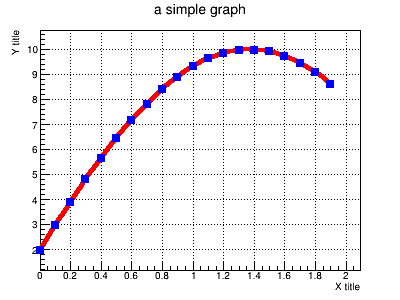

In [15]:
gROOT->GetListOfCanvases()->Draw()